In [1]:
# Customer segmentation is simply grouping customers with similar characteristics. 
# These characteristics include geography, demography, behavioural, purchasing power, 
# situational factors, personality, lifestyle, psychographic, etc. 
# The goals of customer segmentation are customer acquisition, customer retention, 
# increasing customer profitability, customer satisfaction, resource allocation by
# designing marketing measures or programs and improving target marketing measures

#Project : A More retail store wants to get insights about its customers. 
#And then build a system that can cluster customers into different groups.

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [5]:
ds = pd.read_csv("More_Customers.csv")
ds

,CustomerID,Gender,Age,Annual Income (k₹),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
ds.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k₹)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
ds.shape

(200, 5)

In [10]:
ds.describe()

,CustomerID,Age,Annual Income (k₹),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
ds.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k₹)        0
Spending Score (1-100)    0
dtype: int64

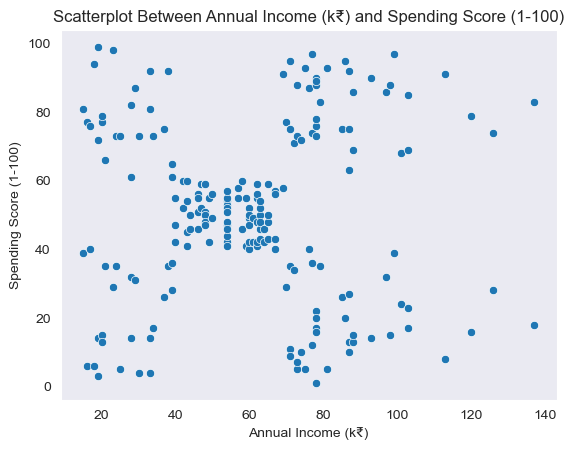

In [12]:
sns.set_style('dark')
sns.scatterplot(x = 'Annual Income (k₹)', y = 'Spending Score (1-100)', data = ds)
plt.xlabel('Annual Income (k₹)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income (k₹) and Spending Score (1-100)')

plt.show()

In [38]:
X = ds.loc[:,['Annual Income (k₹)','Spending Score (1-100)']].values

In [15]:
#Feature Scaling :  range between 0 and 1 normalize differernt values


In [39]:
scaler = MinMaxScaler().fit(X)

In [40]:
print(scaler)

MinMaxScaler()


In [41]:
scaler.feature_range

(0, 1)

In [42]:
scaler.transform(X)

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [21]:
#selection of optimum number of clusters

#WCSS (Within Clusters Sum of Squares) : sum of the squared distance between each member of the cluster and its centroid
# minimize the distance from centroid to ease of calculation

In [47]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
                # inertia_ attribute represents the WCSS for the given clustering configuration. 
#It is the sum of squared distances between each data point and its assigned centroid within the clusters. 

<function matplotlib.pyplot.show(close=None, block=None)>

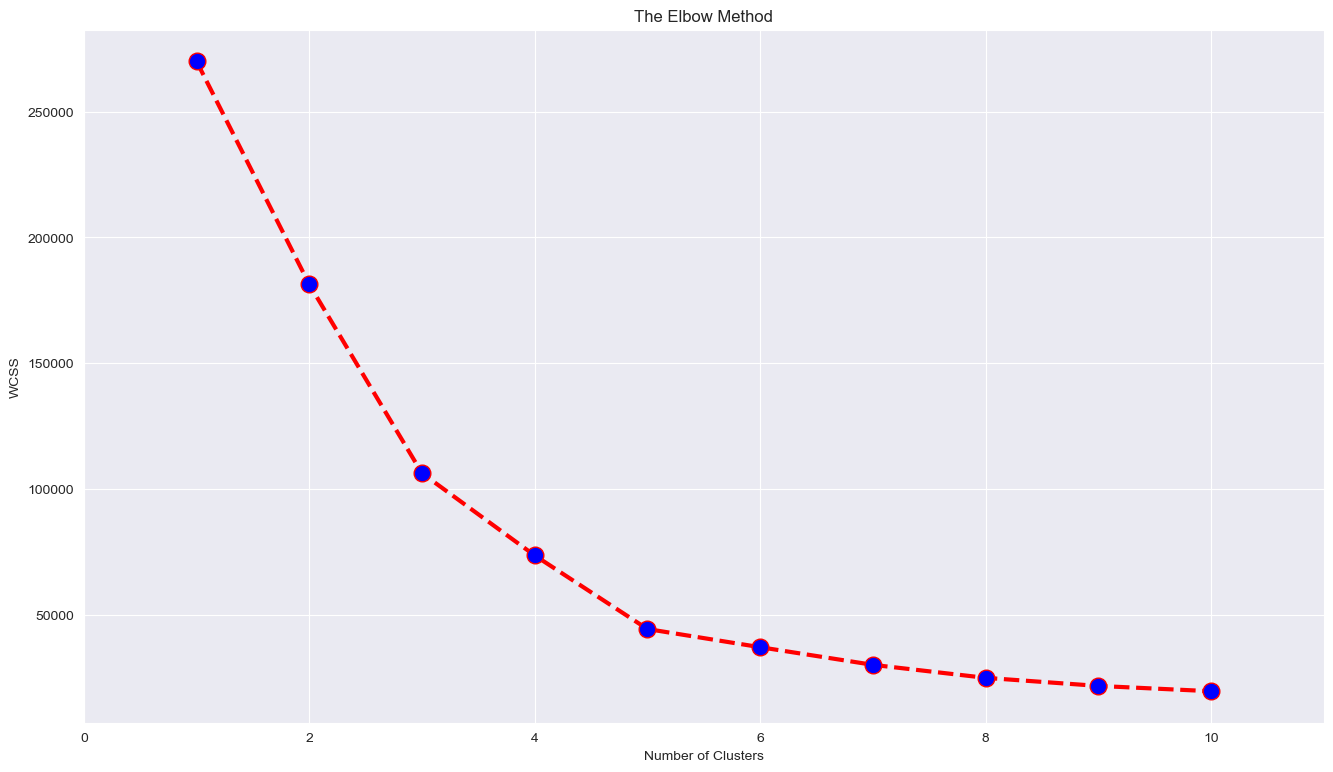

In [48]:
plt.figure(figsize = (16,9))
plt.grid()

plt.plot(range(1,11),wcss, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xlim(0,11)

plt.show

In [49]:
km = KMeans(n_clusters=5)

In [51]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++')
label= kmeans.fit_predict(X) 
print(label)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 2 0 4 0 4 0 2 0 4 0 4 0 4 0 4 0 2 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [52]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


In [53]:
X[y_means==0]

array([[16,  6],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [25,  5],
       [28, 14],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17]], dtype=int64)

In [54]:
X[y_means==0].shape

(12, 2)

In [55]:
X[y_means==1].shape

(29, 2)

In [56]:
X[y_means==2].shape

(20, 2)

In [57]:
X[y_means==3].shape

(34, 2)

In [58]:
X[y_means==4].shape

(21, 2)

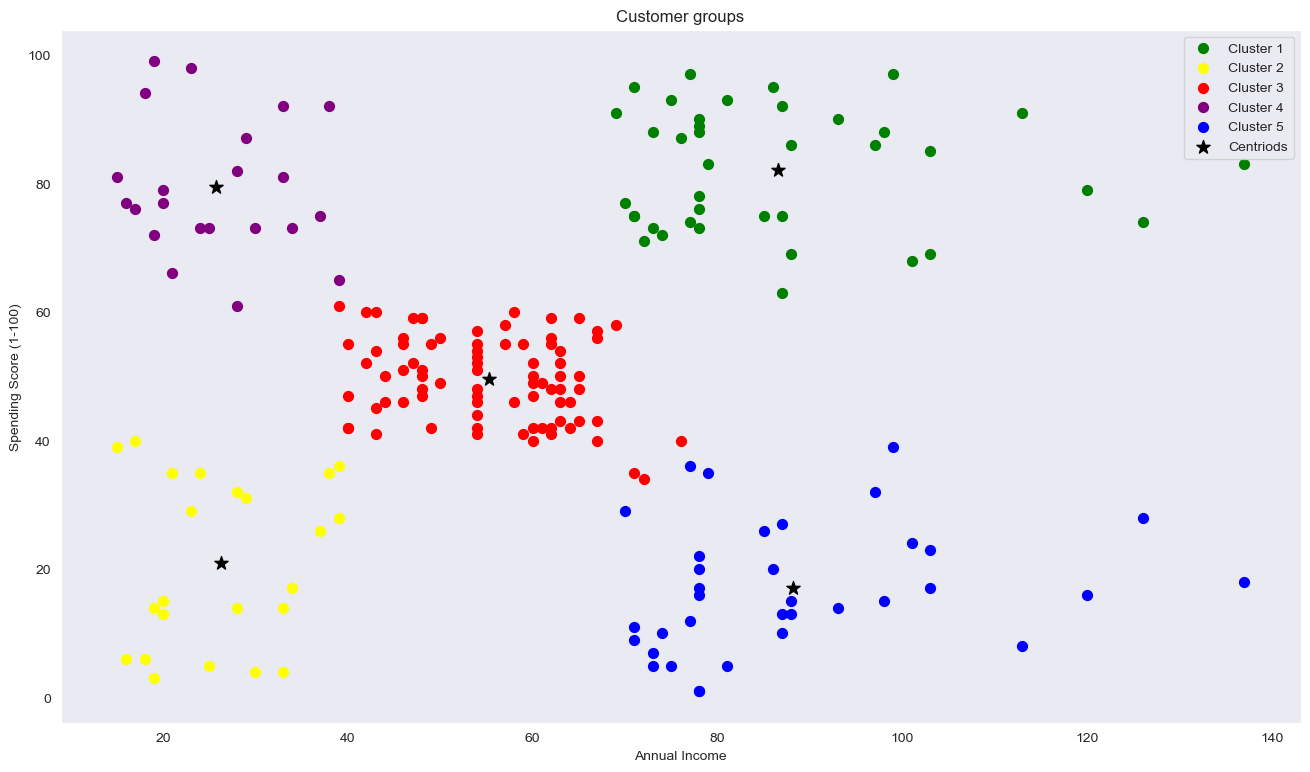

In [59]:
plt.figure(figsize=(16,9))

plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods

plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()  

In [ ]:
# Cluster 1 (red): Average income earners with moderate spending scores. They are cautious spenders at the store.

# Cluster 2 (green): High-income earners with high spending scores. Targeting this group with discounts and offers could maximize profit.

# Cluster 3 (blue): Higher-income individuals with lower spending scores. Potential dissatisfaction with services; marketing efforts could increase their spending and contribute to increased profit.

# Cluster 4 (yellow): Low-income earners with low spending scores. Expectedly, they purchase fewer items at the store.

# Cluster 5 (purple): Low-income earners with surprisingly high spending scores. Suggests high satisfaction with store services, leading to increased spending despite lower incomes. This group presents an opportunity for targeted marketing to enhance loyalty and potentially increase profit.